<a href="https://colab.research.google.com/github/KKeun-B/learning/blob/main/2021/dwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DWT의 전반적인 내용에 대해 정리
출처: https://pywavelets.readthedocs.io/en/latest/regression/dwt-idwt.html,   
https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

1. Discrete Wavelet Transform 'db2'

In [ ]:
#dwt examples
import pywt
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x, 'db2')
print(cA)
print(cD)

[5.65685425 7.39923721 0.22414387 3.33677403 7.77817459]
[-2.44948974 -1.60368225 -4.44140056 -0.41361256  1.22474487]


2. Discrete Wavelet Transform 'sym3'

In [ ]:
w = pywt.Wavelet('sym3')
cA, cD = pywt.dwt(x, wavelet=w, mode='constant')
print(cA)
print(cD)

[ 4.38354585  3.80302657  7.31813271 -0.58565539  4.09727044  7.81994027]
[-1.33068221 -2.78795192 -3.16825651 -0.67715519 -0.09722957 -0.07045258]


3. Pywavelet library의 14 mother wavelets + DWT, CWT graph 비교




['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


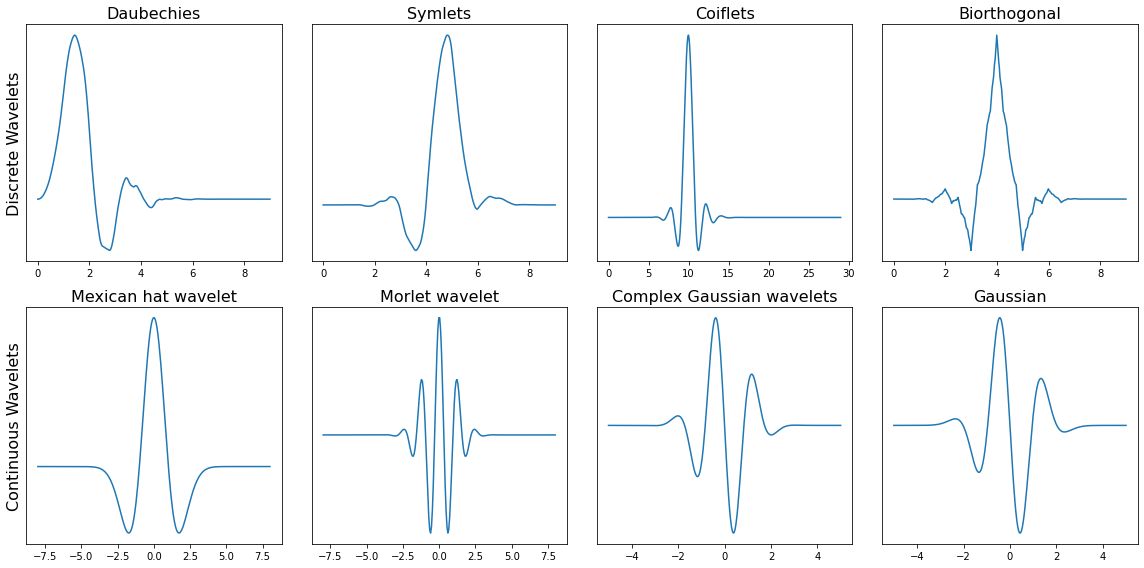

In [24]:
import pywt
import pandas as pd
import matplotlib.pyplot as plt

print(pywt.families(short=False))
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 
'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 
'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

4. Daubechies family의 graph(DWT)

['db1', 'db2', 'db3', 'db4', 'db5']


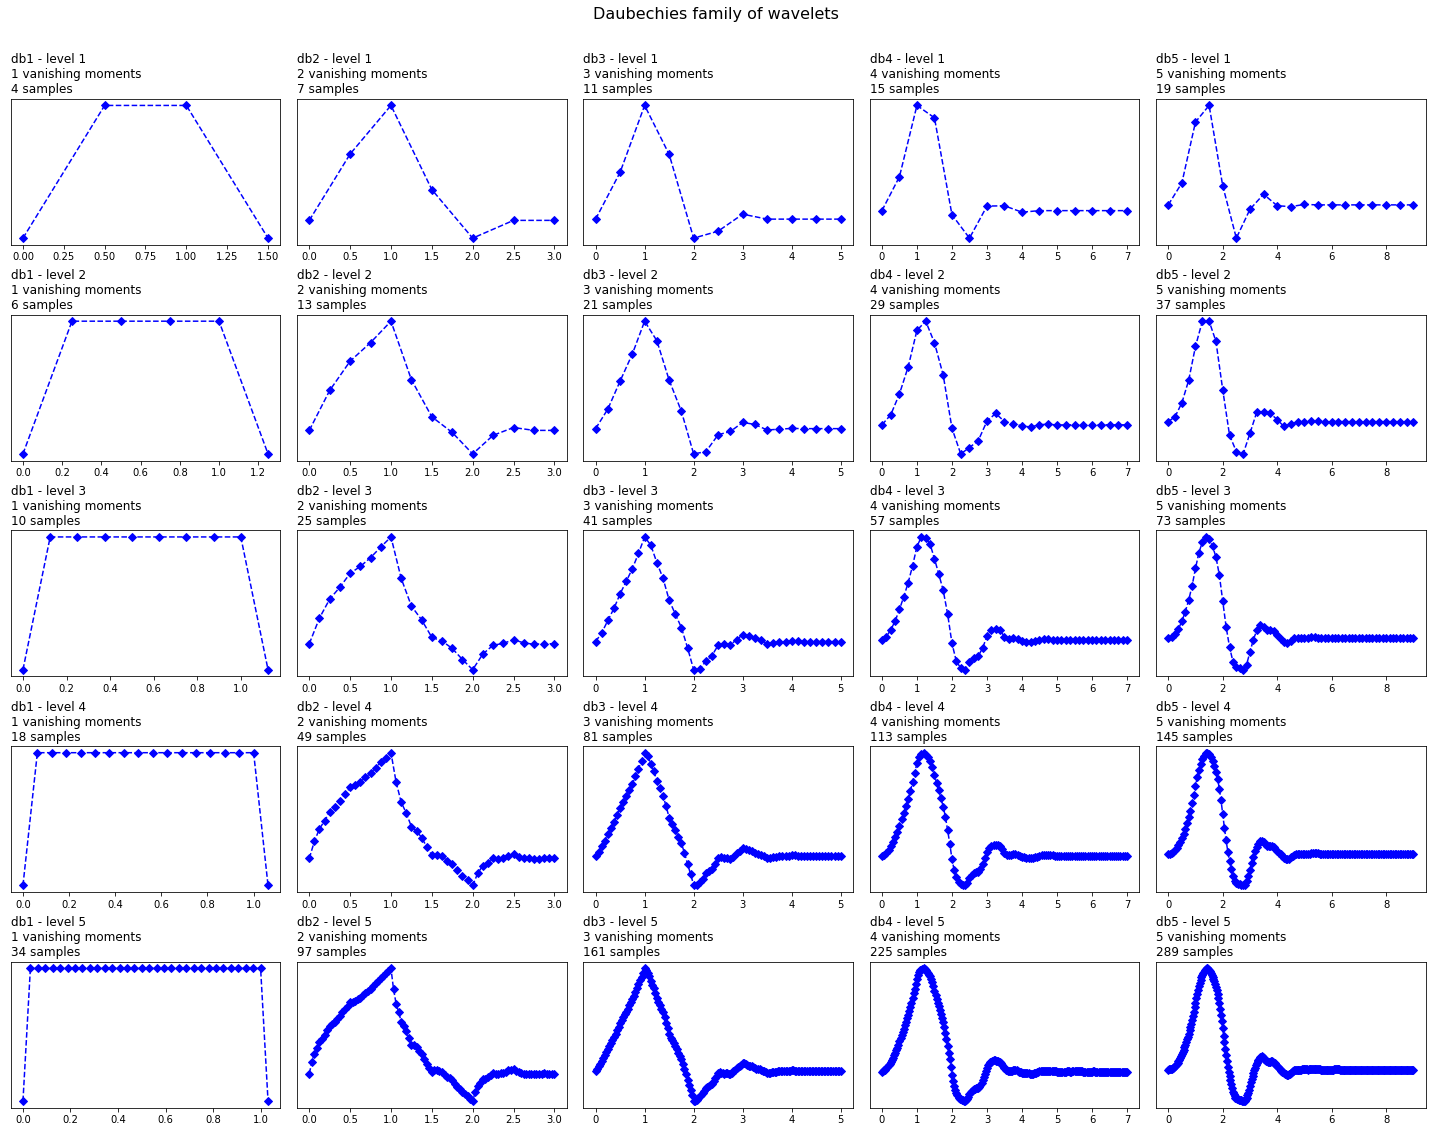

In [27]:

import pywt
import matplotlib.pyplot as plt
 
db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
# ['db1', 'db2', 'db3', 'db4', 'db5']
 
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

5. DWT signal 변환 과정

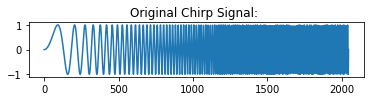

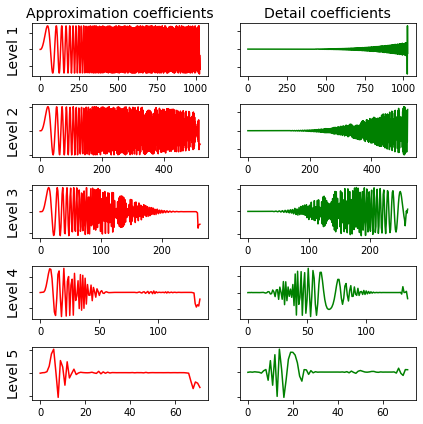

In [29]:
import pywt
 
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

6. pywt.dwt() 사용 예시

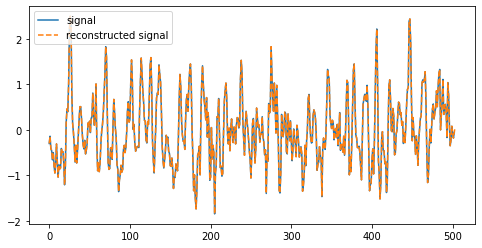

In [41]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
signal = df_nino.values.squeeze()
(cA1, cD1) = pywt.dwt(signal, 'db2', 'smooth')
reconstructed_signal = pywt.idwt(cA1, cD1, 'db2', 'smooth')
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(signal, label='signal')
ax.plot(reconstructed_signal, label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
plt.show()

7. pywt.wavedec() 사용 예시

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


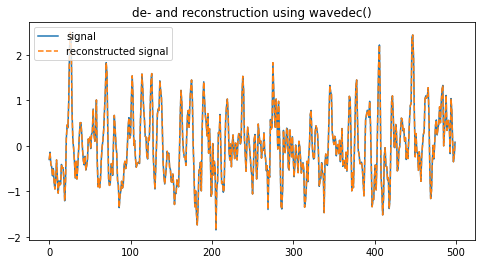

In [39]:

coeffs = pywt.wavedec(signal, 'db2', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db2')
 
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(signal[:500], label='signal')

ax.plot(reconstructed_signal[:500], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

In [53]:
%pwd(C:\\Users\\PC03\\Desktop\\FEMTOBearingDataSet\\Training_set\\Learning_set\\Bearing1_1\\acc_01210.csv)

'/content'

8. Removing (high-frequency) noise using the DWT

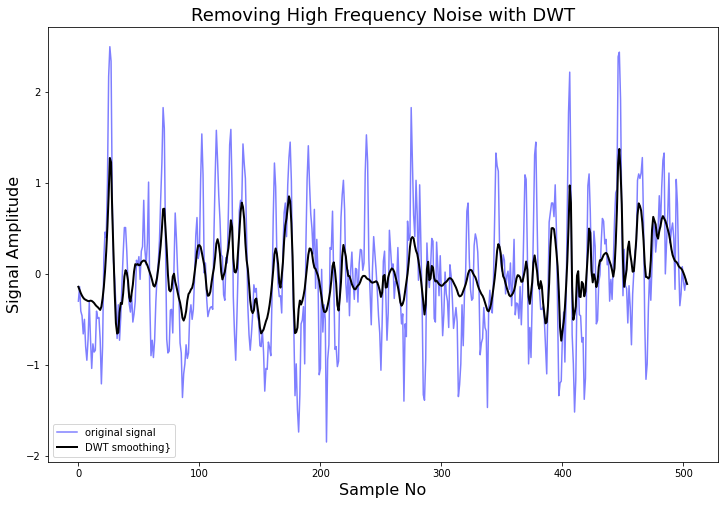

In [58]:
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

9. Removing (high-frequency) noise using the DWT(chirp_signal)



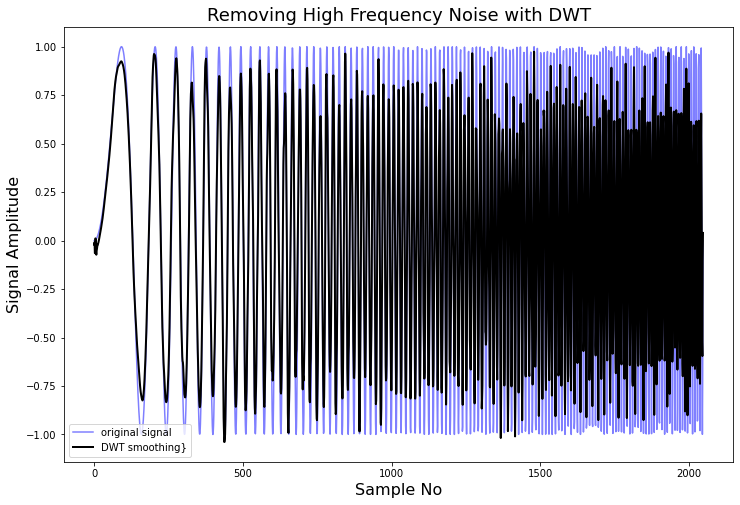

In [60]:
def lowpassfilter(chirp_signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(chirp_signal)
    coeff = pywt.wavedec(chirp_signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(chirp_signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(chirp_signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()